In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def Fx(omega):
    return omega

neg_g = - np.pi ** 2

def Fv(phi, l):
    return neg_g / l * np.sin(phi)

def SolveEuler(l, phi0, omega0, tmax, dt):
    phi, omega  =  phi0, omega0
    res_t = [0]
    res_phi = [phi0]
    res_omega = [omega0]
    for t in np.arange(dt, tmax, dt):
        phi_n = phi + dt * Fx(omega)
        omega_n = omega + dt * Fv(phi, l)
        
        res_t += [t]
        res_phi.append(phi_n)
        res_omega.append(omega_n)
        
        phi, omega = phi_n, omega_n
    
    return res_t, res_phi, res_omega

def SolveMidpoint(l, phi0, omega0, tmax, dt):
    phi, omega  =  phi0, omega0
    res_t = [0]
    res_phi = [phi0]
    res_omega = [omega0]
    for t in np.arange(dt, tmax, dt):
        phi_aux = phi + dt * Fx(omega) / 2
        omega_aux = omega + dt * Fv(phi, l) / 2
        
        phi_n = phi + dt * Fx(omega_aux)
        omega_n = omega + dt * Fv(phi_aux, l)
        
        res_t += [t]
        res_phi.append(phi_n)
        res_omega.append(omega_n)
        
        phi, omega = phi_n, omega_n
    
    return res_t, res_phi, res_omega

def SolveRK4(l, phi0, omega0, tmax, dt):
    phi, omega  =  phi0, omega0
    res_t = [0]
    res_phi = [phi0]
    res_omega = [omega0]
    for t in np.arange(dt, tmax, dt):
        Ko1 = Fx(omega)
        Kp1 = Fv(phi, l)
        Ko2 = Fx(omega + dt * Kp1 / 2)
        Kp2 = Fv(phi + dt * Ko1 / 2, l)
        Ko3 = Fx(omega + dt * Kp2 / 2)
        Kp3 = Fv(phi + dt * Ko2 / 2, l)
        Ko4 = Fx(omega + dt * Kp3)
        Kp4 = Fv(phi + dt * Ko3, l)
        
        phi_n = phi + dt / 6 * (Ko1 + 2 * Ko2 + 2 * Ko3 + Ko4)
        omega_n = omega + dt / 6 * (Kp1 + 2 * Kp2 + 2 * Kp3 + Kp4)
        
        res_t += [t]
        res_phi.append(phi_n)
        res_omega.append(omega_n)
        
        phi, omega = phi_n, omega_n
    
    return res_t, res_phi, res_omega

In [62]:
def solver(method, l, phi0, omega0, tmax, dt):
    if method == "Euler":
        res_t, res_phi, res_omega = SolveEuler(l, phi0, omega0, tmax, dt)
    elif method == "Midpoint":
        res_t, res_phi, res_omega = SolveMidpoint(l, phi0, omega0, tmax, dt)
    else:
        res_t, res_phi, res_omega = SolveRK4(l, phi0, omega0, tmax, dt)

    fig = plt.figure(constrained_layout = True)

    fig.suptitle("Wahadło matematyczne", fontsize = "xx-large")

    subfigs = fig.subfigures(1, 2, wspace=0.07)

    subfigs[1].suptitle("Diagram fazowy")

    axs = subfigs[0].subplots()
    axs.plot(res_t, res_phi, 'r-', label = "Rozwiązanie numeryczne")
    axs.grid()
    axs.set(xlabel = "t", ylabel = r"$\varphi$")

    axr = subfigs[1].subplots()
    axr.plot(res_phi, res_omega)
    axr.grid()
    axr.set(xlabel = r"$\varphi$", ylabel = r"$\omega$")

    plt.show()

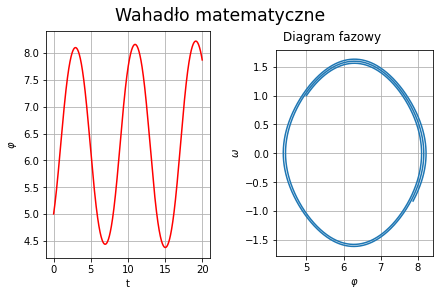

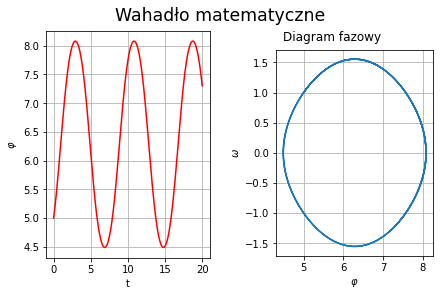

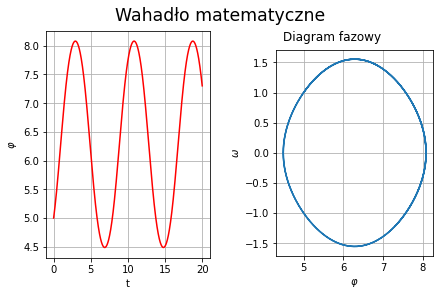

In [70]:
solver("Euler",    10, 5, 1, 20, 0.01)
solver("Midpoint", 10, 5, 1, 20, 0.01)
solver("RK4",      10, 5, 1, 20, 0.01)

In [73]:
class State():
    def __init__(self, s):
        self._value = s
        self._len = len(s)
    
    def val(self):
        return self._value
    
    def __add__(self, other):
        return State([self._value[i] + other._value[i] for i in range(self._len)])
    def __rmul__(self, number):
        return State([number * v for v in self._value])

def UnivSolveRK4(consts, init_cond, F, tmax, dt):
    state = init_cond
    res_t = [0]
    res_states = [init_cond]
    for t in np.arange(dt, tmax, dt):
        K1 = F(state, consts)
        K2 = F(state + (dt/2) * K1, consts)
        K3 = F(state + (dt/2) * K2, consts)
        K4 = F(state + dt * K3, consts)
        
        state_n = state + (dt/6) * (K1 + 2 * K2 + 2 * K3 + K4)
        
        res_t += [t]
        res_states.append(state_n)
        
        state = state_n
    
    return res_t, res_states

In [82]:
def LotkaVolterra(a, b, c, d, x0, y0, tmax, dt):
    consts = [a, b, c, d]
    start = State([x0, y0])
    def F(s, con):
        x, y = s.val()
        a, b, c, d = con
        return State([(a - b*y)*x, (c*x - d)*y])
    res_t, res_states = UnivSolveRK4(consts, start, F, tmax, dt)
    fig = plt.figure(constrained_layout = True)

    fig.suptitle("Model Lotki-Volterry", fontsize = "xx-large")

    axs = fig.subplots()
    axs.plot(res_t, list(map(lambda x: x.val(), res_states)))
#     axs.plot(res_t, res_states[1], 'b-', label = "Y")
    axs.grid()

    axs.set(xlabel = "t", ylabel = "Pop")
    plt.show()

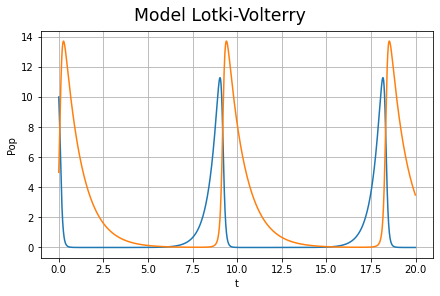

In [96]:
LotkaVolterra(2, 1, 1, 1, 10, 5, 20, .01)